# Linear model for classification
Na regressão, vimos que o alvo a ser previsto era um contínuo
variável. Na classificação, este alvo será discreto (por exemplo, categórico).

Voltaremos ao nosso conjunto de dados de pinguins. No entanto, desta vez, tentaremos
prever as espécies de pinguins usando as informações do cúlmen. Nós também
simplifique nosso problema de classificação selecionando apenas 2 dos pinguins
espécies para resolver um problema de classificação binária.

<div class="admonition note alert alert-info">
<p class="first admonition-title" style="font-weight: bold;">Note</p>
<p class="last"> Se você quiser uma visão geral mais detalhada sobre este conjunto de dados, pode consultar o
Apêndice - seção de descrição dos conjuntos de dados no final deste MOOC. </p>
</div>

In [1]:
from urllib.request import urlretrieve 
# lembre de sempre pegar o arquivo do tipo RAW no github 
url = 'https://raw.githubusercontent.com/INRIA/scikit-learn-mooc/master/datasets/penguins_classification.csv'
urlretrieve(url, 'C:/Users/Rogerio Lopes/Desktop/Rogerio/Machine_Learning_With_Scikit_Learn/Module4_linear_model/penguins_classification.csv')

('C:/Users/Rogerio Lopes/Desktop/Rogerio/Machine_Learning_With_Scikit_Learn/Module4_linear_model/penguins_classification.csv',
 <http.client.HTTPMessage at 0x202d2af6280>)

In [2]:
import pandas as pd

penguins = pd.read_csv("penguins_classification.csv")

# only keep the Adelie and Chinstrap classes
penguins = penguins.set_index("Species").loc[
    ["Adelie", "Chinstrap"]].reset_index()
culmen_columns = ["Culmen Length (mm)", "Culmen Depth (mm)"]
target_column = "Species"

Podemos começar rapidamente visualizando a distribuição de recursos por classe:

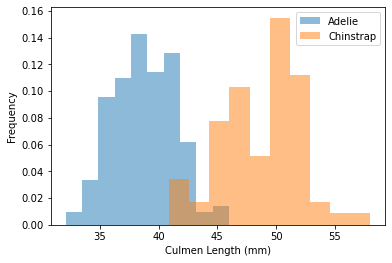

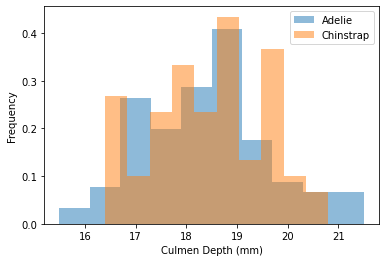

In [3]:
import matplotlib.pyplot as plt

for feature_name in culmen_columns:
    plt.figure()
    # plot the histogram for each specie
    penguins.groupby("Species")[feature_name].plot.hist(
        alpha=0.5, density=True, legend=True)
    plt.xlabel(feature_name)

Podemos observar que temos um problema bastante simples. Quando o culmen
o comprimento aumenta, a probabilidade de que o pinguim seja um Chinstrap é mais próxima
a 1. No entanto, a profundidade do cúlmen não é útil para prever o pinguim
espécies.

Para o ajuste do modelo, vamos separar o alvo dos dados e
vamos criar um treinamento e um conjunto de teste.

In [4]:
from sklearn.model_selection import train_test_split

penguins_train, penguins_test = train_test_split(penguins, random_state=0)

data_train = penguins_train[culmen_columns]
data_test = penguins_test[culmen_columns]

target_train = penguins_train[target_column]
target_test = penguins_test[target_column]

range_features = {
    feature_name: (penguins[feature_name].min() - 1,
                   penguins[feature_name].max() + 1)
    for feature_name in culmen_columns
}

Para visualizar a separação encontrada por nosso classificador, vamos definir um auxiliar
função `plot_decision_function`. Em suma, esta função irá traçar a borda
da função de decisão, onde a probabilidade de ser uma Adelie ou Chinstrap
será igual (p = 0,5).

In [5]:
import numpy as np


def plot_decision_function(fitted_classifier, range_features, ax=None):
    """Plot the boundary of the decision function of a classifier."""
    from sklearn.preprocessing import LabelEncoder

    feature_names = list(range_features.keys())
    # create a grid to evaluate all possible samples
    plot_step = 0.02
    xx, yy = np.meshgrid(
        np.arange(*range_features[feature_names[0]], plot_step),
        np.arange(*range_features[feature_names[1]], plot_step),
    )

    # compute the associated prediction
    Z = fitted_classifier.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = LabelEncoder().fit_transform(Z)
    Z = Z.reshape(xx.shape)

    # make the plot of the boundary and the data samples
    if ax is None:
        _, ax = plt.subplots()
    ax.contourf(xx, yy, Z, alpha=0.4, cmap="RdBu_r")

    return ax

A regressão linear que vimos anteriormente irá prever uma contínua
saída. Quando o alvo é um resultado binário, pode-se usar a logística
função para modelar a probabilidade. Este modelo é conhecido como logístico
regressão.

Scikit-learn fornece a classe `LogisticRegression` que implementa este
algoritmo.

In [6]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

logistic_regression = make_pipeline(
    StandardScaler(), LogisticRegression(penalty="none")
)
logistic_regression.fit(data_train, target_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression(penalty='none'))])

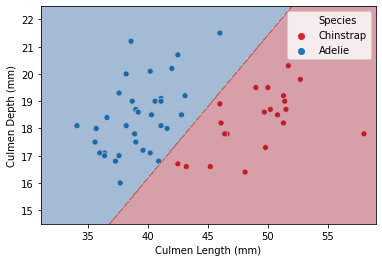

In [7]:
import seaborn as sns

ax = sns.scatterplot(
    data=penguins_test, x=culmen_columns[0], y=culmen_columns[1],
    hue=target_column, palette=["tab:red", "tab:blue"])
_ = plot_decision_function(logistic_regression, range_features, ax=ax)

Assim, vemos que nossa função de decisão é representada por uma linha que separa
as 2 classes. Devemos também observar que não impusemos nenhuma regularização
definindo o parâmetro `penalty` para` 'none'`.

Uma vez que a linha é oblíqua, significa que usamos uma combinação de ambos
recursos:

In [8]:
coefs = logistic_regression[-1].coef_[0]  # the coefficients is a 2d array
weights = pd.Series(coefs, index=culmen_columns)

Text(0.5, 1.0, 'Weights of the logistic regression')

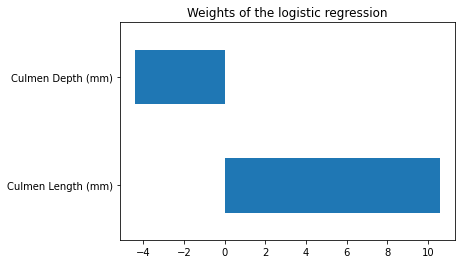

In [9]:
weights.plot.barh()
plt.title("Weights of the logistic regression")

Na verdade, ambos os coeficientes não são nulos.

# 📝 Exercício M4.05
No caderno anterior, apresentamos uma regressão logística não penalizada
classificador. Este classificador aceita um parâmetro `penalidade` para adicionar um
regularização. A intensidade da regularização é definida usando o parâmetro `C`.

Neste exercício, pedimos que você treine uma regressão logística penalizada com 12
classificador e descobrir por si mesmo o efeito do parâmetro `C`.

Começaremos carregando o conjunto de dados e criaremos a função auxiliar para mostrar
a separação de decisão como no código anterior.

<div class="admonition note alert alert-info">
<p class="first admonition-title" style="font-weight: bold;">Note</p>
<p class="last"> Se você quiser uma visão geral mais detalhada sobre este conjunto de dados, pode consultar o
Apêndice - seção de descrição dos conjuntos de dados no final deste MOOC. </p>
</div>

In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split

penguins = pd.read_csv("penguins_classification.csv")
# only keep the Adelie and Chinstrap classes
penguins = penguins.set_index("Species").loc[
    ["Adelie", "Chinstrap"]].reset_index()

culmen_columns = ["Culmen Length (mm)", "Culmen Depth (mm)"]
target_column = "Species"
data, target = penguins[culmen_columns], penguins[target_column]

data_train, data_test, target_train, target_test = train_test_split(
    data, target, stratify=target, random_state=0,
)
range_features = {
    feature_name: (data[feature_name].min() - 1, data[feature_name].max() + 1)
    for feature_name in data
}

In [12]:
import numpy as np
import matplotlib.pyplot as plt


def plot_decision_function(fitted_classifier, range_features, ax=None):
    """Plot the boundary of the decision function of a classifier."""
    from sklearn.preprocessing import LabelEncoder

    feature_names = list(range_features.keys())
    # create a grid to evaluate all possible samples
    plot_step = 0.02
    xx, yy = np.meshgrid(
        np.arange(*range_features[feature_names[0]], plot_step),
        np.arange(*range_features[feature_names[1]], plot_step),
    )

    # compute the associated prediction
    Z = fitted_classifier.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = LabelEncoder().fit_transform(Z)
    Z = Z.reshape(xx.shape)

    # make the plot of the boundary and the data samples
    if ax is None:
        _, ax = plt.subplots()
    ax.contourf(xx, yy, Z, alpha=0.4, cmap="RdBu")
    ax.set_xlabel(feature_names[0])
    ax.set_ylabel(feature_names[1])

    return ax

Dado o seguinte candidato para o parâmetro `C`, descubra qual é o
efeito do valor deste parâmetro no limite de decisão e no
pesos magnitude.

In [13]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

Cs = [0.01, 0.1, 1, 10]
logistic_regression = make_pipeline(
    StandardScaler(), LogisticRegression(penalty="l2"))

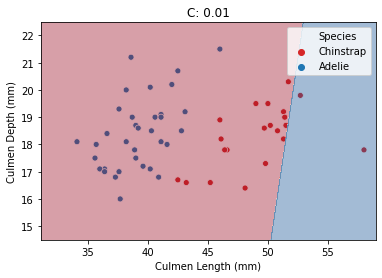

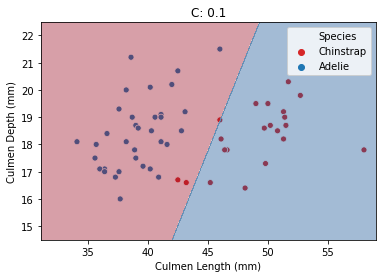

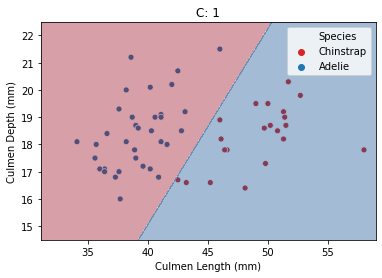

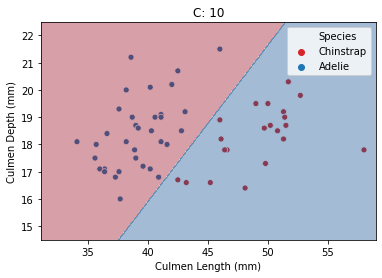

In [14]:
Cs = [0.01, 0.1, 1, 10]

# solution
import seaborn as sns

for C in Cs:
    logistic_regression.set_params(logisticregression__C=C)
    logistic_regression.fit(data_train, target_train)

    plt.figure()
    ax = sns.scatterplot(
        data=penguins_test, x=culmen_columns[0], y=culmen_columns[1],
        hue=target_column, palette=["tab:red", "tab:blue"])
    plot_decision_function(logistic_regression, range_features, ax=ax)
    plt.title(f"C: {C}")

In [15]:
# solution
weights_ridge = []
for C in Cs:
    logistic_regression.set_params(logisticregression__C=C)
    logistic_regression.fit(data_train, target_train)
    coefs = logistic_regression[-1].coef_[0]
    weights_ridge.append(pd.Series(coefs, index=culmen_columns))

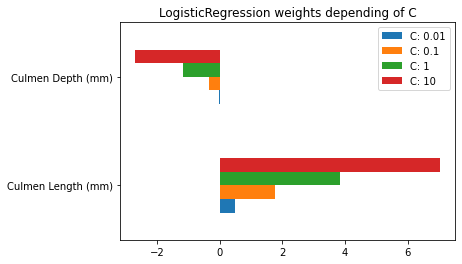

In [16]:
weights_ridge = pd.concat(
    weights_ridge, axis=1, keys=[f"C: {C}" for C in Cs])
weights_ridge.plot.barh()
_ = plt.title("LogisticRegression weights depending of C")

Vemos que um pequeno C reduzirá os valores dos pesos até zero. Isso significa que um C pequeno fornece um modelo mais regularizado. Assim, C é o inverso do coeficiente alfa no modelo de Ridge.

Além disso, com uma grande penalidade (ou seja, pequeno valor C), o peso do recurso "Profundidade de Culmen (mm)" é quase zero. Isso explica porque a separação de decisão no gráfico é quase perpendicular ao recurso “Comprimento de Culmen (mm)”.